In [4]:

import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sketch
from shapely.geometry import Point
import seaborn as sns
import time


# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx")

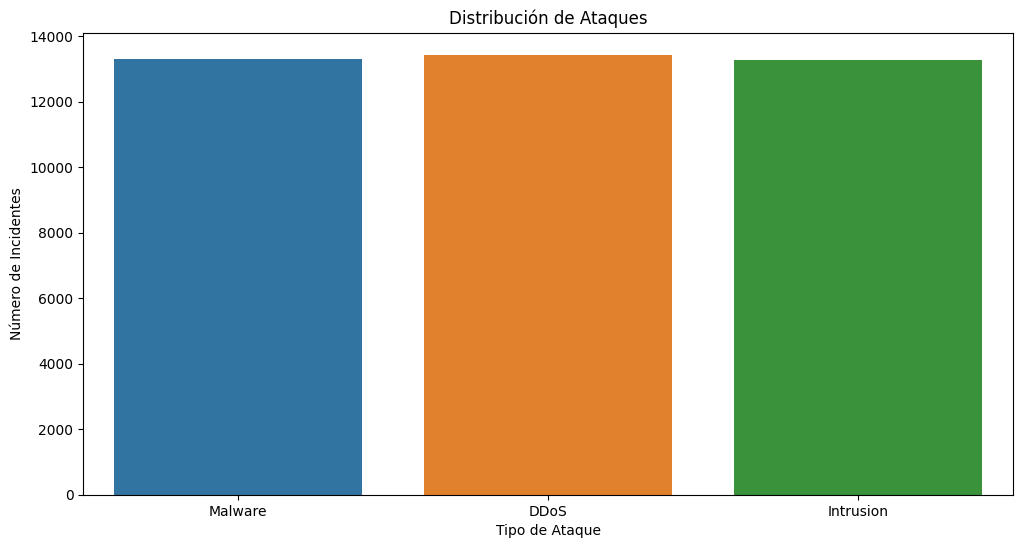

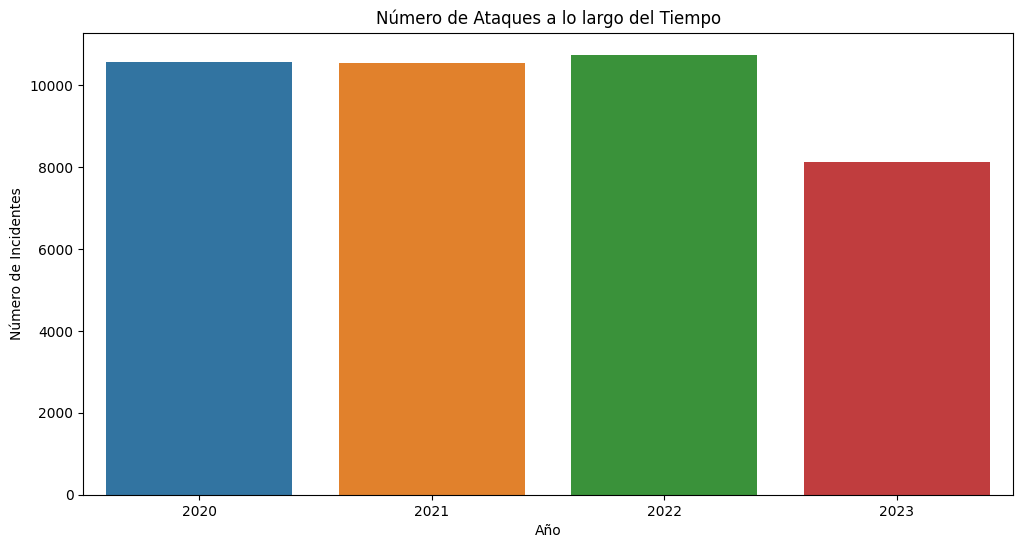

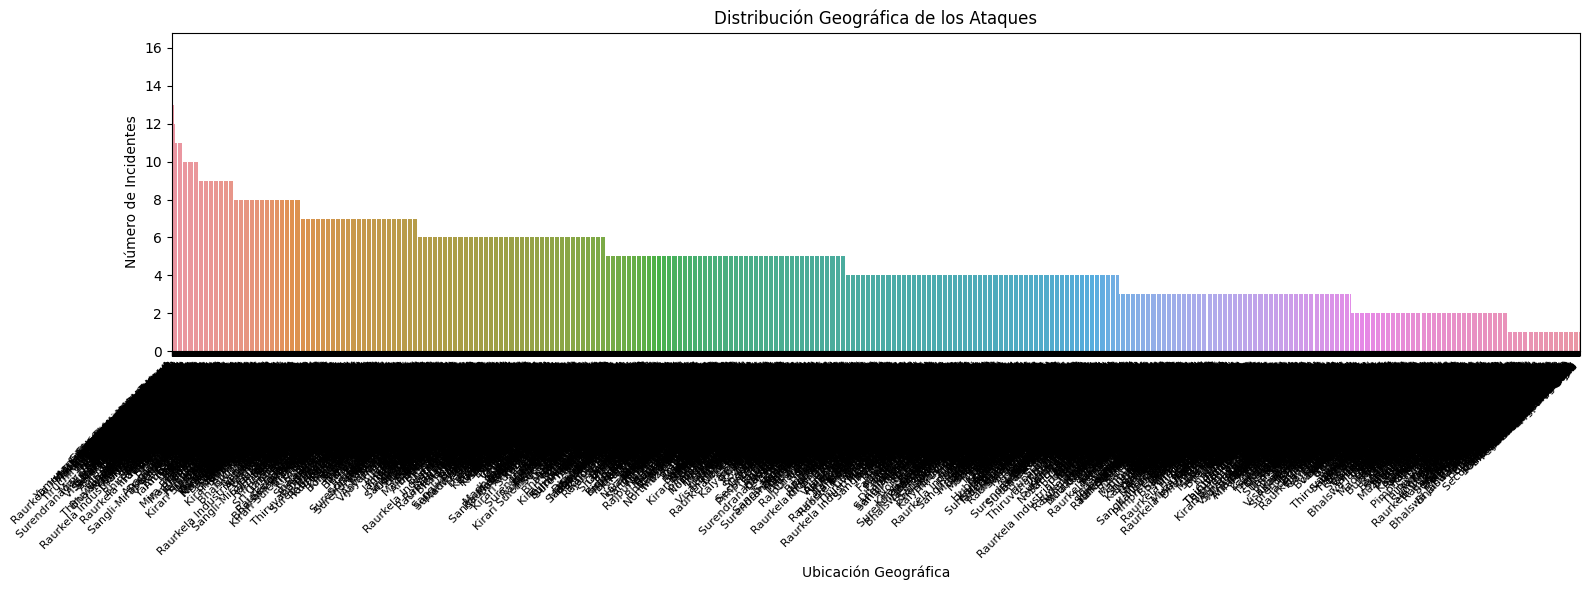

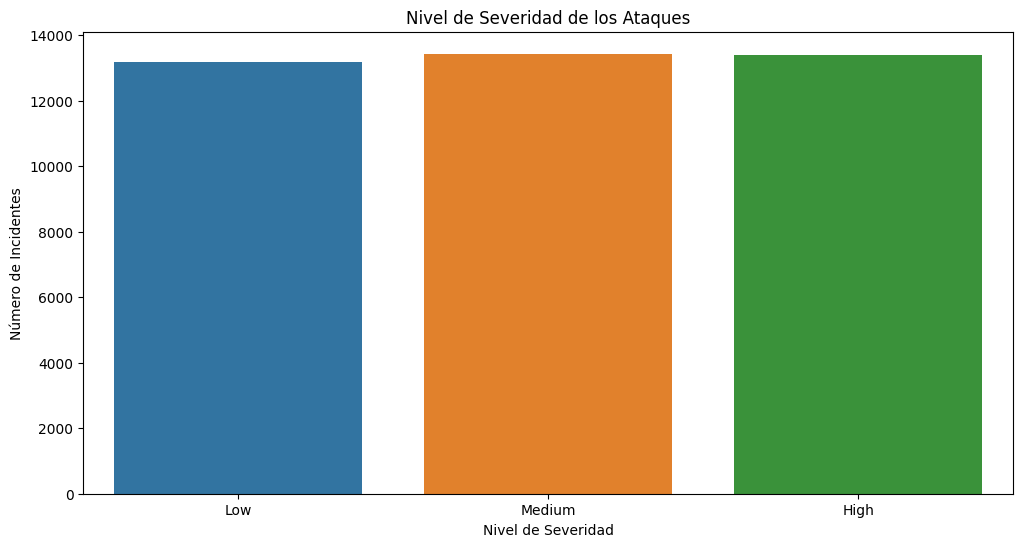

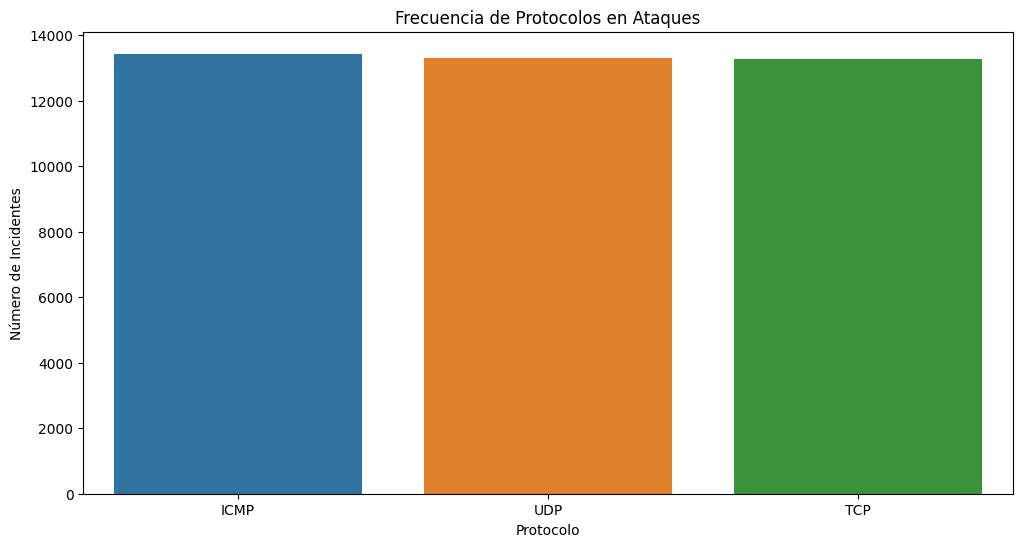

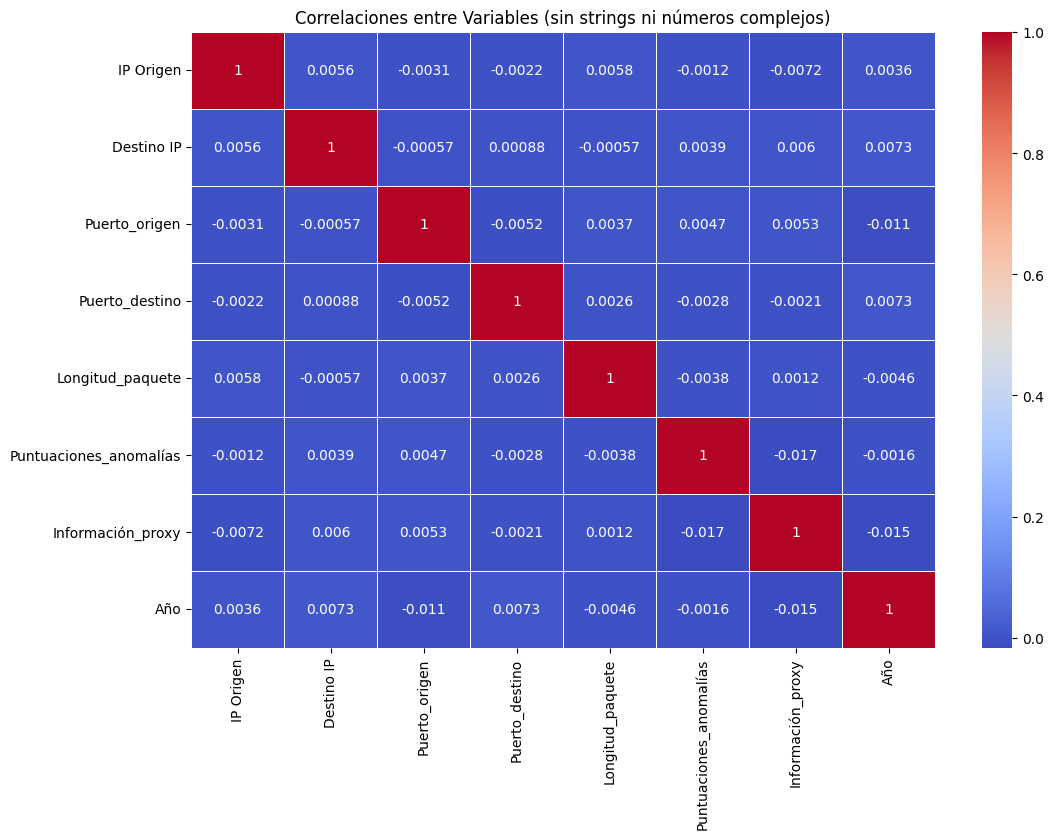

ValueError: could not convert string to float: 'ICMP'

<Figure size 1200x800 with 0 Axes>

In [15]:

# Convertir la columna 'Fecha_hora' a formato datetime
data['Fecha_hora'] = pd.to_datetime(data['Fecha_hora'])


# Distribución de Ataques
plt.figure(figsize=(12, 6))
sns.countplot(x='Tipo_ataque', data=data)
plt.title('Distribución de Ataques')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Número de Incidentes')
plt.show()

# Análisis Temporal
data['Año'] = data['Fecha_hora'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x='Año', data=data)
plt.title('Número de Ataques a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')
plt.show()

# Origen de los Ataques
plt.figure(figsize=(16, 6))  # Ajusta el ancho de la figura
ax = sns.countplot(x='Datos_geolocalización', data=data, order=data['Datos_geolocalización'].value_counts().index)
ax.set_title('Distribución Geográfica de los Ataques')
ax.set_xlabel('Ubicación Geográfica')
ax.set_ylabel('Número de Incidentes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Ajusta la rotación y el tamaño de las etiquetas
plt.tight_layout()

# Mostrar solo cada n-ésima etiqueta (ajusta el valor de n según tus necesidades)
n = 10
for label in ax.xaxis.get_ticklabels()[::n]:
    label.set_visible(True)
for label in ax.xaxis.get_ticklabels()[1::n]:
    label.set_visible(False)

plt.show()
"""# Origen de los Ataques
plt.figure(figsize=(14, 6))
sns.countplot(x='Datos_geolocalización', data=data, order=data['Datos_geolocalización'].value_counts().index)
plt.title('Distribución Geográfica de los Ataques')
plt.xlabel('Ubicación Geográfica')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.show()"""

# Consecuencias y Respuestas
plt.figure(figsize=(12, 6))
sns.countplot(x='Nivel_severidad', data=data)
plt.title('Nivel de Severidad de los Ataques')
plt.xlabel('Nivel de Severidad')
plt.ylabel('Número de Incidentes')
plt.show()

# Frecuencia de Protocolos
plt.figure(figsize=(12, 6))
sns.countplot(x='Protocolo', data=data)
plt.title('Frecuencia de Protocolos en Ataques')
plt.xlabel('Protocolo')
plt.ylabel('Número de Incidentes')
plt.show()

# Exploración de Características
# (Puedes agregar gráficos e histogramas para las características específicas)

#eliminar las columnas que contienen strings o números complejos antes de calcular la correlación
def filter_numeric_columns(df):
    # Filtrar solo las columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Eliminar columnas que contienen strings o números complejos
    filtered_cols = [col for col in numeric_cols if all(isinstance(val, (int, float)) and not isinstance(val, complex) for val in df[col])]
    
    return df[filtered_cols]


# Aplicar la función antes de calcular la correlación
filtered_data = filter_numeric_columns(data)

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables (sin strings ni números complejos)')
plt.show()

# Correlaciones y Relaciones
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables')
plt.show()

# Identificar columnas no numéricas
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
print("Columnas no numéricas:", non_numeric_columns)

# Eliminar columnas complejas
data_no_complex = data.select_dtypes(exclude=['complex'])


# Convertir números complejos a cadenas
data_string = data.applymap(lambda x: str(x) if isinstance(x, complex) else x)



# Seleccionar solo las columnas numéricas excluyendo 'Datos_geolocalización'
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Datos_geolocalización'], errors='ignore')

# Codificar columnas categóricas
data_encoded = pd.get_dummies(data)

# Correlaciones y Relaciones
plt.figure(figsize=(12, 8))
sns.heatmap(data_no_complex.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables(sin numeros complejos)')
plt.show()

# Descripción estadística
filtered_data.describe()



# Crear un histograma de la distribución de tipos de ataques
plt.figure(figsize=(10, 6))
data['Tipo_ataque'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Ataques')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()






In [9]:
print(data.describe(include='all'))


                           Fecha_hora     IP Origen    Destino IP  \
count                           40000  4.000000e+04  4.000000e+04   
unique                            NaN           NaN           NaN   
top                               NaN           NaN           NaN   
freq                              NaN           NaN           NaN   
mean    2021-11-22 06:17:52.200800256  3.031392e+10  3.055188e+10   
min               2020-01-01 00:43:27  2.151700e+04  2.208900e+04   
25%        2020-12-12 19:56:28.500000  1.001700e+09  1.028973e+09   
50%               2021-11-21 18:12:51  6.466671e+09  6.729165e+09   
75%        2022-10-30 08:48:10.500000  1.996264e+10  2.011926e+10   
max               2023-10-11 19:34:23  2.232533e+11  2.232552e+11   
std                               NaN  5.466664e+10  5.473096e+10   

        Puerto_origen  Puerto_destino Protocolo  Longitud_paquete  \
count    40000.000000    40000.000000     40000      40000.000000   
unique            NaN            

In [ ]:
"""# Supongamos que tienes un archivo shapefile con las provincias del país
# Reemplaza 'ruta_del_shapefile' con la ubicación de tu archivo shapefile
shapefile_path = 'ruta_del_shapefile'
provincias = gpd.read_file(shapefile_path)

# Fusiona los datos geográficos con los datos de ataques
data_geografica = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitud, data.Latitud))
ataques_por_provincia = gpd.sjoin(data_geografica, provincias, op='within')

# Plotea el mapa
fig, ax = plt.subplots(figsize=(12, 8))
provincias.boundary.plot(ax=ax)
ataques_por_provincia.plot(ax=ax, color='red', markersize=10, alpha=0.7)
plt.title('Distribución Geográfica de los Ataques por Provincia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()"""

In [24]:
#CREAR UN DF CON LAS COLUMNAS DATOS GEO, INCIDENTES Y TIPOS
# Crear un nuevo DataFrame con la columna 'Datos_geolocalización'
df_ciudades = data[['Datos_geolocalización']].copy()

# Agrupar por 'Datos_geolocalización' y contar el número de incidentes y tipos de ataque
df_agregado = data.groupby('Datos_geolocalización')['Tipo_ataque'].agg(['count', 'nunique']).reset_index()

# Renombrar las columnas para mayor claridad
df_agregado = df_agregado.rename(columns={'count': 'Número de Incidentes', 'nunique': 'Número de Tipos de Ataque'})

# Fusionar el nuevo DataFrame 'df_ciudades' con el DataFrame agregado
df_GEO_in_tipo = pd.merge(df_ciudades, df_agregado, on='Datos_geolocalización', how='left')

# Visualizar las primeras filas del DataFrame relacionado
df_GEO_in_tipo.head(1)


,Datos_geolocalización,Número de Incidentes,Número de Tipos de Ataque
0,"Jamshedpur, Sikkim",6,2


In [ ]:
"""# sacar el archivo shapefile del dataframe para reducir la graic aa provicnias dentro de cada pais atacado

# Supongamos que tienes un DataFrame llamado 'data' con las columnas 'Ciudad', 'Latitud' y 'Longitud'
# Reemplaza esto con el nombre real de tu DataFrame y las columnas correspondientes
data = pd.DataFrame({
    'Ciudad': ['Ciudad1', 'Ciudad2', 'Ciudad3'],  # Ejemplo de nombres de ciudades
    'Latitud': [latitud1, latitud2, latitud3],  # Reemplaza con las latitudes reales
    'Longitud': [longitud1, longitud2, longitud3]  # Reemplaza con las longitudes reales
})

# Crea un GeoDataFrame a partir del DataFrame
geometry = [Point(xy) for xy in zip(data['Longitud'], data['Latitud'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Guarda el GeoDataFrame como un archivo Shapefile
# Reemplaza 'ruta_para_guardar_shapefile' con la ubicación y nombre de archivo que desees
shapefile_path = 'ruta_para_guardar_shapefile'
gdf.to_file(shapefile_path, driver='ESRI Shapefile')

print(f"Archivo Shapefile guardado en: {shapefile_path}")
["Datos_geolocalización"]"""

In [25]:
# DEL NUEVO DATAFRAME VAMOS A SVAR UBICACION GEOGRAFICA ASI COMO LANTITUD Y LONGITUD DE LAS CIUDADES

# Crear una instancia del geocodificador (utilizando Nominatim en este caso)
geolocator = Nominatim(user_agent="my_geocoder")

# Función para obtener las coordenadas geográficas de una ubicación
def obtener_coordenadas(ubicacion):
    df_GEO_in_tipo = pd.merge(df_ciudades, df_agregado, on='Datos_geolocalización', how='left')

    try:
        location = geolocator.geocode(ubicacion)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {ubicacion}: {e}")
        return None, None

# Aplicar la función a la columna 'Datos_geolocalización' y crear nuevas columnas
df_GEO_in_tipo[['Latitud', 'Longitud']] = df_GEO_in_tipo['Datos_geolocalización'].apply(lambda x: pd.Series(obtener_coordenadas(x)))

# Visualizar el DataFrame resultante
print(df_GEO_in_tipo[['Datos_geolocalización', 'Latitud', 'Longitud']])

Error al obtener coordenadas para Bangalore, Kerala: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Bangalore%2C+Kerala&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error al obtener coordenadas para Khora , Andhra Pradesh: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Khora+%2C+Andhra+Pradesh&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error al obtener coordenadas para Yamunanagar, Manipur: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Yamunanagar%2C+Manipur&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read